# Construction of FFNN based on normalized training space
Upon stabilization and convergence of the model training loss curve to a non small number, normalization becomes imperative to homogenize the training space. Here, the training procedure is reiterated on a normalized training space employing two methods, namely min-max and Z-score normalization. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import save_model

In [2]:
# Loading Design_space and moment_capacity matrix
Design_space = np.load('Design_space.npy')
moment_capacity = np.load('Mu.npy')

## Loading the training space and normalizing 
Normalization of input data for training a neural network is a crucial preprocessing step that ensures stable and efficient training. It involves scaling the input features to a similar range, typically between 0 and 1 or with zero mean and unit variance. This helps prevent certain features from dominating the learning process and can accelerate convergence during training. Here's how we can normalize input data for training the neural network using min-max normalization and Z-score normalization:

1. Min-Max Normalization: Min-max normalization scales the input features to a fixed range, typically between 0 and 1.
$$
x_{\text {norm }}=\frac{x-\min (x)}{\max (x)-\min (x)}
$$


In [8]:
# Min-Max Normalization
Design_space_normalized_min_max = (Design_space - np.min(Design_space, axis=0)) / (np.max(Design_space, axis=0) - np.min(Design_space, axis=0))
moment_capacity_normalized_min_max = (moment_capacity - np.min(moment_capacity, axis=0)) / (np.max(moment_capacity, axis=0) - np.min(moment_capacity, axis=0))


2. Z-score Normalization: Z-score normalization (also known as standardization) scales the input features to have a mean of 0 and a standard deviation of 1 .
$$
x_{\text {norm }}=\frac{x-\operatorname{mean}(x)}{\operatorname{std}(x)}
$$

In [19]:
# Z-score Normalization:
Design_space_normalized_z_score = (Design_space - np.mean(Design_space, axis=0)) / np.std(Design_space, axis=0)
moment_capacity_normalized_z_score = (moment_capacity - np.mean(moment_capacity, axis=0)) / np.std(moment_capacity, axis=0)

## Defining the neural network model with arbitrary hyperparameters (64,32) and ReLU activation function.

In [20]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),  # Input layer with 1 neuron
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(3)  # Output layer with 3 neurons
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error loss and Adam optimizer

## Training the FFNN based on normalized data, plotting Model Training Loss curve and saving Trained Model

C:\Users\adelpasand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


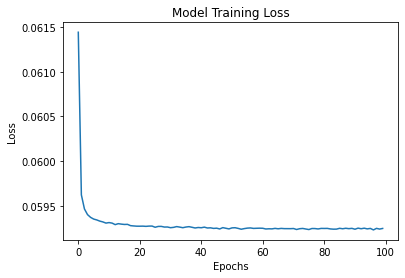

In [21]:
# Train the model
history = model.fit(moment_capacity_normalized_min_max, Design_space_normalized_min_max, epochs=100, batch_size=16, verbose=0)
model.save('trained_model_normalized.h5')
# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Testing the trained FFNN on the nodes within the training space.

In [25]:
from tensorflow.keras.models import load_model
model = load_model('trained_model_normalized.h5')

# picking 7 row from the data
step_size = moment_capacity_normalized_min_max.shape[0]//7

# selected actual design parameters associated with moment capacity .
selected_actual_params= Design_space_normalized_min_max[::step_size]
moment_capacity_test = moment_capacity_normalized_min_max[::step_size] # New input data for prediction
print(selected_actual_params)
print(moment_capacity_test)

# Predict on new data
moment_capacity_test = moment_capacity_test

Designe_pred = model.predict(moment_capacity_test)
print(Designe_pred)




[[0.         0.         0.        ]
 [0.14285714 0.14285714 0.14285714]
 [0.28571429 0.28571429 0.28571429]
 [0.42857143 0.42857143 0.42857143]
 [0.57142857 0.57142857 0.57142857]
 [0.71428571 0.71428571 0.71428571]
 [0.85714286 0.85714286 0.85714286]
 [1.         1.         1.        ]]
[0.         0.00381487 0.02450936 0.08534097 0.19114609 0.36546621
 0.62815207 1.        ]
1/1 [==============================] - 0s 54ms/step
[[0.2064572  0.21585573 0.04229271]
 [0.36279863 0.3517815  0.11299947]
 [0.42552924 0.41475585 0.33774716]
 [0.49812958 0.455112   0.55061555]
 [0.56310415 0.5477495  0.6709012 ]
 [0.6465385  0.6659286  0.788031  ]
 [0.7494507  0.8108835  0.8934489 ]
 [0.8971634  1.0175762  0.97920465]]


## Visualizing the accuracy of FFNN predictions.

C:\Users\adelpasand\AppData\Local\Temp\ipykernel_15956\1213876623.py:2: RuntimeWarning: divide by zero encountered in divide
  errors_width = 100*np.abs(selected_actual_params[:, 0] - Designe_pred[:, 0])/selected_actual_params[:, 0]
C:\Users\adelpasand\AppData\Local\Temp\ipykernel_15956\1213876623.py:3: RuntimeWarning: divide by zero encountered in divide
  errors_height = 100*np.abs(selected_actual_params[:, 1] - Designe_pred[:, 1])/selected_actual_params[:, 1]
C:\Users\adelpasand\AppData\Local\Temp\ipykernel_15956\1213876623.py:4: RuntimeWarning: divide by zero encountered in divide
  errors_reinforcement =100*np.abs(selected_actual_params[:, 2] - Designe_pred[:, 2])/selected_actual_params[:, 2]


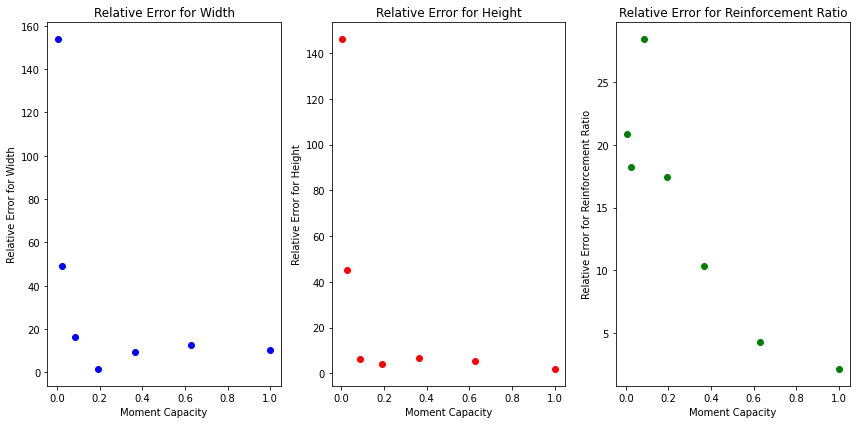

In [26]:

# Calculate the absolute errors for each predicted parameter
errors_width = 100*np.abs(selected_actual_params[:, 0] - Designe_pred[:, 0])/selected_actual_params[:, 0]
errors_height = 100*np.abs(selected_actual_params[:, 1] - Designe_pred[:, 1])/selected_actual_params[:, 1]
errors_reinforcement =100*np.abs(selected_actual_params[:, 2] - Designe_pred[:, 2])/selected_actual_params[:, 2]

# Plot the absolute errors for each predicted parameter
plt.figure(figsize=(12, 6))

# Width
plt.subplot(1, 3, 1)
plt.scatter(moment_capacity_test, errors_width, color='blue')
plt.xlabel('Moment Capacity')
plt.ylabel('Relative Error for Width')
plt.title('Relative Error for Width')

# Height
plt.subplot(1, 3, 2)
plt.scatter(moment_capacity_test, errors_height, color='red')
plt.xlabel('Moment Capacity')
plt.ylabel('Relative Error for Height')
plt.title('Relative Error for Height')

# Reinforcement ratio
plt.subplot(1, 3, 3)
plt.scatter(moment_capacity_test, errors_reinforcement, color='green')
plt.xlabel('Moment Capacity')
plt.ylabel('Relative Error for Reinforcement Ratio')
plt.title('Relative Error for Reinforcement Ratio')

plt.tight_layout()
plt.show()
